In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Introduction

In [ ]:
In the following paragraphs, we will consider that the economy at a time 0 is in its steady state. 
At time 10, we will simulate a shock in the economy that will suffer from in order: 
• an increase in n 
• an increase in s 
• an increase in delta
• an increase in A

We will then see the short term and long term results of these shock on the economy. 

Terminology
• K = capital
• L = labor
• n = population growth rate
• s = saving rate
• delta = depreciation rate
• A = technology (factor of productivity)
• alpha = input shares of capital 
• (1-alpha) = input shares of labor*

Notes
The data I have chosen for the parameters are data I have found in some research articles on numerical application of the solow model I read on the internet.

# If n increases

### The steady state

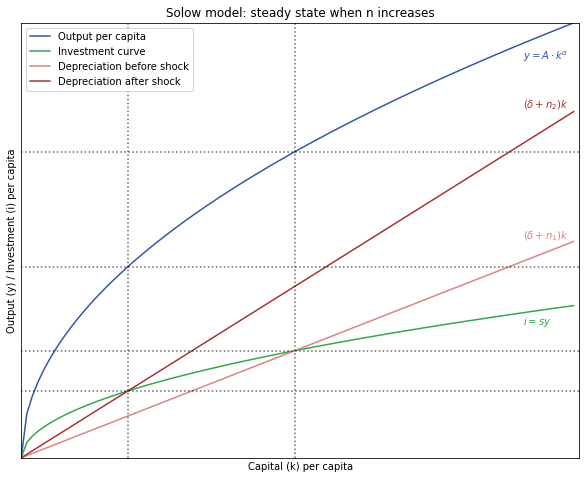

In [ ]:
# Parameters
K_size = 100                                                                     # Domain of the x axis, arbitrary data
k = np.arange(K_size)                                                            # Create array of k (future x axis)
alpha = 0.5                                                                      # Elasticity of production
s = 0.35                                                                         # Saving rate
delta = 0.03                                                                     # Depreciation rate
A = 1                                                                            # Normalized total factor of productivity (TFP)
n1 = 0.02                                                                        # Population growth rate before the shock
n2 = 0.05                                                                        # Population growth rate after the shock


# Functions
def f(k):                                                                        # Cobb-Douglas production function (per capita)
    y = A * k ** alpha   
    return y
y = f(k)                                                                         # Cobb-Douglas production function (per capita)
d = delta * k                                                                    # Depreciation curve 
i = s * y                                                                        # Investment funtion
d_and_i1 = (delta + n1) * k                                                      # Depreciation curve with n1
d_and_i2 = (delta + n2) * k                                                      # Depreciation curve with n2


# Calculate the steady state value
k_star_1 = (s/(n1 + delta) * A) ** (1/(1 - alpha))
k_star_2 = (s/(n2 + delta) * A) ** (1/(1 - alpha))
y_star_1 = A * (k_star_1 ** alpha)
y_star_2 = A * (k_star_2 ** alpha)
i_star_1 = s * y_star_1
i_star_2 = s * y_star_2
c_star_1 = y_star_1 - i_star_1
c_star_2 = y_star_2 - i_star_2
d_star_1 = alpha * k_star_1
d_star_2 = alpha * k_star_2


# Plot the Solow Model
y_max = np.max(y)                                                                # Y axis maximum to create a range
v = [0, K_size, 0, y_max]                                                        # Axis ranges

fig, ax = plt.subplots(figsize=(10,8))                                           # Image size
ax.set(title="Solow model: steady state when n increases", xlabel=r'$k$')

ax.plot(k, y, '#3257a8', ls='-', label="Output per capita")                      # Plotting the Production Function 
ax.plot(k, i, '#32a84a', ls='-', label="Investment curve")                       # Plotting the Investment Function 
ax.plot(k, d_and_i1, '#db8484', ls='-', label="Depreciation before shock")       # Plotting the Depreciation Curve before the shock
ax.plot(k, d_and_i2,'#a83232', ls='-', label="Depreciation after shock")         # Plotting the Depreciation Curve after the shock

plt.text(90, 9.1, r'$y = A \cdot k^{\alpha}$', color = '#3257a8')                # Plotting some eplanatory text 
plt.text(90, 3.05, r'$i = sy$', color = '#32a84a')                              
plt.text(90, 5.0, r'$(\delta + n_{1})k$', color = '#db8484')                     
plt.text(90, 8.0, r'$(\delta + n_{2})k$', color = '#a83232') 
plt.legend(loc='best')                                                           # Where to plot the legend on the figure

plt.axvline(x = k_star_1, ls = ":", color = 'k', alpha = 0.6)                    # Add vertical dot lines across the axes at the steady states
plt.axhline(y = i_star_1, ls = ":", color = 'k', alpha = 0.6)
plt.axhline(y = y_star_1, ls = ":", color = 'k', alpha = 0.6)
plt.axvline(x = k_star_2, ls = ":", color = 'k', alpha = 0.6)
plt.axhline(y = i_star_2, ls = ":", color = 'k', alpha = 0.6)
plt.axhline(y = y_star_2, ls = ":", color = 'k', alpha = 0.6)

plt.xlabel('Capital (k) per capita')                                                 # Name the axis
plt.ylabel('Output (y) / Investment (i) per capita')

ax.yaxis.set_major_locator(plt.NullLocator())                                    # Hide ticks
ax.xaxis.set_major_locator(plt.NullLocator()) 

plt.axis(v)
plt.show()

### The shock

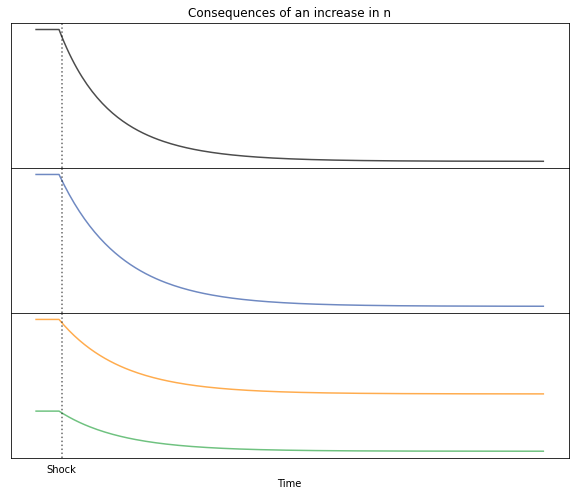

In [ ]:
T = 200                                                                          # Number of periods
t_shock = 10                                                                     # Period when shock happens

time = np.arange(T)                                                              # Array of time
y = np.zeros(T)         
k = np.zeros(T)         
i = np.zeros(T)         
c = np.zeros(T)         

y[0] = y_star_1                                                                  # Set initial values, at first, the economy is in its steady state
k[0] = k_star_1
i[0] = i_star_1
c[0] = c_star_1

n = np.zeros(T)
n[0:T] = n1                                                                      # From 0 to t_shock, the population growth rate is n1, from t_shock to T, the population growth rate is n2
n[t_shock:T] = n2                                                               

for j in range(1, T):                                                            # For each period, we calculate the variables
    k[j] = k[j-1] + i[j-1] - (n[j] + delta) * k[j-1]
    y[j] = A * k[j] ** alpha
    i[j] = s * y[j]
    c[j] = y[j] - i[j]
    
# Plot the effect of the shock on variables
ticks = [""] * T                                                                 # Create tick labels on the axis
ticks[t_shock] = 'Shock'                                                         # Create label "shock" 

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))          # Create a figure with 3 graphs
fig.subplots_adjust(hspace=0)                                                    # Plots be next to each other

ax1.set(title="Consequences of an increase in n")                                # Title
ax1.plot(time, k, "k-", alpha = 0.7)                                             # Alpha is here a variable for the line transparency
ax1.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax1.yaxis.set_major_locator(plt.NullLocator())                                   # Hide ticks
#ax1.text(150, 22.1, 'Capital: '+r'$k$')

ax2.plot(time, y, "#3257a8", alpha = 0.7)
ax2.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax2.yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
#ax2.text(150, 4.7, 'Output: '+ r'$y=f(k)$', color = "#3257a8")

ax3.plot(time, i, "#32a84a", alpha = 0.7)
ax3.plot(time, c, "#ff8903", alpha = 0.7)
ax3.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax3.yaxis.set_major_locator(plt.NullLocator())                                   # Hide ticks
ax3.xaxis.set_major_locator(plt.NullLocator())                                   # Hide ticks
#ax3.text(150, 3.1, 'Consumption: '+r'$c = (1-s)y$', color = "#ff8903")
#ax3.text(150, 1.7, 'Investment: '+r'$i = sy$'     , color = "#32a84a")

plt.xticks(time, ticks)                                                          # Use user-defined ticks
plt.xlabel('Time')
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)       # Hide tick marks

# If s increases

### The steady state

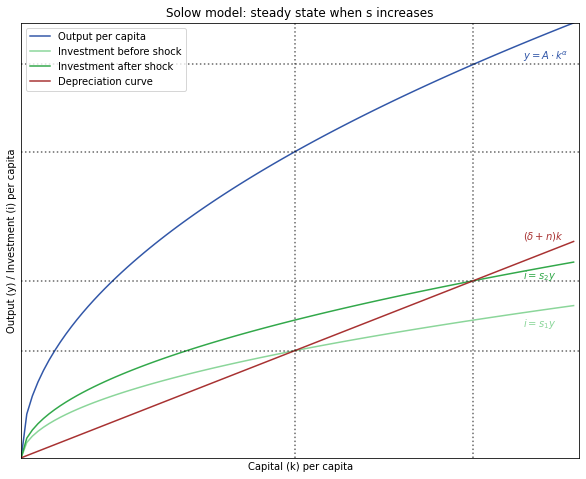

In [ ]:
# Parameters
K_size = 100                                                                     # Domain of the x axis, arbitrary data
k = np.arange(K_size)                                                            # Create array of k (future x axis)
alpha = 0.5                                                                      # Elasticity of production
s1 = 0.35                                                                        # Saving rate before the shock
s2 = 0.45                                                                        # Saving rate after the shock
delta = 0.03                                                                     # Depreciation rate
A = 1                                                                            # Normalized total factor of productivity (TFP)
n = 0.02                                                                         # Population growth rate


# Functions
def f(k):                                                                        # Cobb-Douglas production function (per capita)
    y = A * k ** alpha   
    return y
y = f(k)                                                                         # Cobb-Douglas production function (per capita)
d = delta * k                                                                    # Depreciation curve 
i1 = s1 * y                                                                      # Investment funtion with s1 (before the shock)
i2 = s2 * y                                                                      # Investment function with s2 (after the shock)
d_and_i = (delta + n) * k                                                        # Depreciation curve with n1


# Calculate the steady state value
k_star_1 = (s1/ (n + delta) * A) ** (1/(1 - alpha))
k_star_2 = (s2/(n + delta) * A) ** (1/(1 - alpha))
y_star_1 = A * (k_star_1 ** alpha)
y_star_2 = A * (k_star_2 ** alpha)
i_star_1 = s1 * y_star_1
i_star_2 = s2 * y_star_2
c_star_1 = y_star_1 - i_star_1
c_star_2 = y_star_2 - i_star_2
d_star_1 = alpha * k_star_1
d_star_2 = alpha * k_star_2


# Plot the Solow Model
y_max = np.max(y)                                                                # Y axis maximum to create a range
v = [0, K_size, 0, y_max]                                                        # Axis ranges

fig, ax = plt.subplots(figsize=(10,8))                                           # Image size
ax.set(title="Solow model: steady state when s increases", xlabel=r'$k$')

ax.plot(k, y, '#3257a8', ls='-', label="Output per capita")                      # Plotting the Production Function 
ax.plot(k, i1, '#8bd69a', ls='-', label="Investment before shock")               # Plotting the Investment Function before the shock
ax.plot(k, i2, '#32a84a', ls='-', label="Investment after shock")                # Plotting the Investment Function after the shock
ax.plot(k, d_and_i, '#a83232', ls='-', label="Depreciation curve")                     # Plotting the Depreciation Curve

plt.text(90, 9.1, r'$y = A \cdot k^{\alpha}$', color = '#3257a8')                # Plotting some eplanatory text
plt.text(90, 3, r'$i = s_{1}y$'            , color = '#8bd69a')
plt.text(90, 4.1, r'$i = s_{2}y$'            , color = "#32a84a")
plt.text(90, 5.0, r'$(\delta + n)k$'         , color = '#a83232')
plt.legend(loc='best')                                                           # Where to plot the legend

plt.axvline(x = k_star_1, ls = ":", color = 'k', alpha = 0.6)                    # Add vertical dot lines across the axes at the steady states
plt.axhline(y = i_star_1, ls = ":", color = 'k', alpha = 0.6)
plt.axhline(y = y_star_1, ls = ":", color = 'k', alpha = 0.6)
plt.axvline(x = k_star_2, ls = ":", color = 'k', alpha = 0.6)
plt.axhline(y = i_star_2, ls = ":", color = 'k', alpha = 0.6)
plt.axhline(y = y_star_2, ls = ":", color = 'k', alpha = 0.6)

plt.xlabel('Capital (k) per capita')                                                 # Name the axis
plt.ylabel('Output (y) / Investment (i) per capita')

ax.yaxis.set_major_locator(plt.NullLocator())                                    # Hide ticks
ax.xaxis.set_major_locator(plt.NullLocator()) 

plt.axis(v)
plt.show()

###The shock

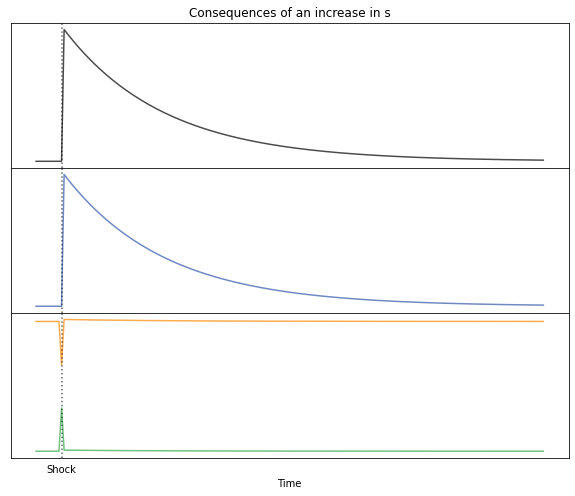

In [ ]:
T = 200                                                                          # Number of periods
t_shock = 10                                                                     # Period when shock happens

time = np.arange(T)                                                              # Array of time
y = np.zeros(T)         
k = np.zeros(T)         
i = np.zeros(T)         
c = np.zeros(T)         

y[0] = y_star_1                                                                  # Set initial values, at first, the economy is in its steady state
k[0] = k_star_1
i[0] = i_star_1
c[0] = c_star_1

s = np.zeros(T)
s[0:T] = s1                                                                      # From 0 to t_shock, the population growth rate is n1, from t_shock to T, the population growth rate is n2
s[t_shock] = s2

for j in range(1, T):                                                            # For each period, we calculate the variables
    k[j] = k[j-1] + i[j-1] - (n + delta) * k[j-1]
    y[j] = A * k[j] ** alpha
    i[j] = s[j] * y[j]
    c[j] = y[j] - i[j]

# Plot the effect of the shock on variables
ticks = [""] * T                                                                 # Create tick labels on the axis
ticks[t_shock] = 'Shock'                                                         # Create label "shock" 

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))          # Create a figure with 3 graphs
fig.subplots_adjust(hspace=0)                                                    # Plots be next to each other

ax1.set(title="Consequences of an increase in s")                                # Title
ax1.plot(time, k, "k-", alpha = 0.7)                                             # Alpha is here a variable for the line transparency
ax1.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax1.yaxis.set_major_locator(plt.NullLocator())                                   # Hide ticks
#ax1.text(150, 22.1, 'Capital: '+r'$k$')

ax2.plot(time, y, "#3257a8", alpha = 0.7)
ax2.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax2.yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
#ax2.text(150, 4.7, 'Output: '+ r'$y=f(k)$', color = "#3257a8")

ax3.plot(time, i, "#32a84a", alpha = 0.7)
ax3.plot(time, c, "#ff8903", alpha = 0.7)
ax3.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax3.yaxis.set_major_locator(plt.NullLocator())                                   # Hide ticks
ax3.xaxis.set_major_locator(plt.NullLocator())                                   # Hide ticks
#ax3.text(150, 3.1, 'Consumption: '+r'$c = (1-s)y$', color = "#ff8903")
#ax3.text(150, 1.7, 'Investment: '+r'$i = sy$'     , color = "#32a84a")

plt.xticks(time, ticks)                                                          # Use user-defined ticks
plt.xlabel('Time')
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)       # Hide tick marks

#If delta increases

###The steady state

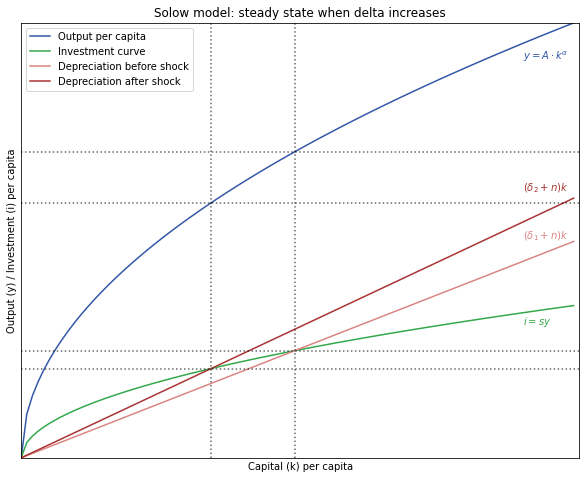

In [ ]:
# Parameters
K_size = 100                                                                     # Domain of the x axis, arbitrary data
k = np.arange(K_size)                                                            # Create array of k (future x axis)
alpha = 0.5                                                                      # Elasticity of production
s = 0.35                                                                         # Saving rate
delta1 = 0.03                                                                    # Depreciation rate before the shock
delta2 = 0.04                                                                    # Depreciation rate after the shock
A = 1                                                                            # Normalized total factor of productivity (TFP)
n = 0.02                                                                         # Population growth rate 


# Functions
def f(k):                                                                        # Cobb-Douglas production function (per capita)
    y = A * k ** alpha   
    return y
y = f(k)                                                                         # Cobb-Douglas production function (per capita)
d1 = delta1 * k                                                                  # Depreciation curve before the shock
d2 = delta2 * k                                                                  # Depreciation curve after the shock
i = s * y                                                                        # Investment funtion
d_and_i1 = (delta1 + n) * k                                                      # Depreciation curve
d_and_i2 = (delta2 + n) * k                                                      # Depreciation curve


# Calculate the steady state value
k_star_1 = (s/(n + delta1) * A) ** (1/(1 - alpha))
k_star_2 = (s/(n + delta2) * A) ** (1/(1 - alpha))
y_star_1 = A * (k_star_1 ** alpha)
y_star_2 = A * (k_star_2 ** alpha)
i_star_1 = s * y_star_1
i_star_2 = s * y_star_2
c_star_1 = y_star_1 - i_star_1
c_star_2 = y_star_2 - i_star_2
d_star_1 = alpha * k_star_1
d_star_2 = alpha * k_star_2


# Plot the Solow Model
y_max = np.max(y)                                                                # Y axis maximum to create a range
v = [0, K_size, 0, y_max]                                                        # Axis ranges

fig, ax = plt.subplots(figsize=(10,8))                                           # Image size
ax.set(title="Solow model: steady state when delta increases", xlabel=r'$k$')

ax.plot(k, y, '#3257a8', ls='-', label="Output per capita")                      # Plotting the Production Function 
ax.plot(k, i, '#32a84a', ls='-', label="Investment curve")                             # Plotting the Investment Function 
ax.plot(k, d_and_i1, '#db8484', ls='-', label="Depreciation before shock")       # Plotting the Depreciation Curve before the shock
ax.plot(k, d_and_i2,'#a83232', ls='-', label="Depreciation after shock")         # Plotting the Depreciation Curve after the shock

plt.text(90, 9.1, r'$y = A \cdot k^{\alpha}$', color = '#3257a8')                # Plotting some eplanatory text 
plt.text(90, 3.05, r'$i = sy$', color = '#32a84a')                              
plt.text(90, 5.0, r'$(\delta_{1} + n)k$', color = '#db8484')                     
plt.text(90, 6.1, r'$(\delta_{2} + n)k$', color = '#a83232') 
plt.legend(loc='best')                                                           # Where to plot the legend on the figure

plt.axvline(x = k_star_1, ls = ":", color = 'k', alpha = 0.6)                    # Add vertical dot lines across the axes at the steady states
plt.axhline(y = i_star_1, ls = ":", color = 'k', alpha = 0.6)
plt.axhline(y = y_star_1, ls = ":", color = 'k', alpha = 0.6)
plt.axvline(x = k_star_2, ls = ":", color = 'k', alpha = 0.6)
plt.axhline(y = i_star_2, ls = ":", color = 'k', alpha = 0.6)
plt.axhline(y = y_star_2, ls = ":", color = 'k', alpha = 0.6)

plt.xlabel('Capital (k) per capita')                                                 # Name the axis
plt.ylabel('Output (y) / Investment (i) per capita')

ax.yaxis.set_major_locator(plt.NullLocator())                                    # Hide ticks
ax.xaxis.set_major_locator(plt.NullLocator()) 

plt.axis(v)
plt.show()

###The shock

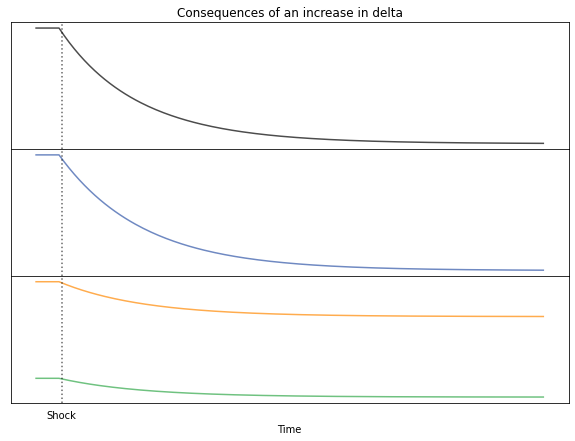

In [ ]:
T = 200                                                                          # Number of periods
t_shock = 10                                                                     # Period when shock happens

time = np.arange(T)                                                              # Array of time
y = np.zeros(T)         
k = np.zeros(T)         
i = np.zeros(T)         
c = np.zeros(T)         

y[0] = y_star_1                                                                  # Set initial values, at first, the economy is in its steady state
k[0] = k_star_1
i[0] = i_star_1
c[0] = c_star_1

delta = np.zeros(T)
delta[0:T] = delta1                                                              # From 0 to t_shock, the population growth rate is n1, from t_shock to T, the population growth rate is n2
delta[t_shock:T] = delta2                                                               

for j in range(1, T):                                                            # For each period, we calculate the variables
    k[j] = k[j-1] + i[j-1] - (n + delta[j]) * k[j-1]
    y[j] = A * k[j] ** alpha
    i[j] = s * y[j]
    c[j] = y[j] - i[j]
    
# Plot the effect of the shock on variables
ticks = [""] * T                                                                 # Create tick labels on the axis
ticks[t_shock] = 'Shock'                                                         # Create label "shock" 

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 7))          # Create a figure with 3 graphs
fig.subplots_adjust(hspace=0)                                                    # Plots be next to each other

ax1.set(title="Consequences of an increase in delta")                            # Title
ax1.plot(time, k, "k-", alpha = 0.7)                                             # Alpha is here a variable for the line transparency
ax1.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax1.yaxis.set_major_locator(plt.NullLocator())                                   # Hide ticks
#ax1.text(150, 22.1, 'Capital: '+r'$k$')

ax2.plot(time, y, "#3257a8", alpha = 0.7)
ax2.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax2.yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
#ax2.text(150, 4.7, 'Output: '+ r'$y=f(k)$', color = "#3257a8")

ax3.plot(time, i, "#32a84a", alpha = 0.7)
ax3.plot(time, c, "#ff8903", alpha = 0.7)
ax3.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax3.yaxis.set_major_locator(plt.NullLocator())                                   # Hide ticks
ax3.xaxis.set_major_locator(plt.NullLocator())                                   # Hide ticks
#ax3.text(150, 3.1, 'Consumption: '+r'$c = (1-s)y$', color = "#ff8903")
#ax3.text(150, 1.7, 'Investment: '+r'$i = sy$'     , color = "#32a84a")

plt.xticks(time, ticks)                                                          # Use user-defined ticks
plt.xlabel('Time')
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)       # Hide tick marks

#If A increases

###The steady state

In [ ]:
# Parameters
K_size = 100                                                                     # Domain of the x axis, arbitrary data
k = np.arange(K_size)                                                            # Create array of k (future x axis)
alpha = 0.5                                                                      # Elasticity of production
s = 0.35                                                                         # Saving rate
delta = 0.03                                                                     # Depreciation rate
A1 = 1                                                                           # Normalized total factor of productivity (TFP) before the shock
A2 = 1.2                                                                         # TFP after the shock
n = 0.02                                                                         # Population growth rate before the shock


# Functions
def f1(k):                                                                        # Cobb-Douglas production function (per capita) with A1
    y1 = A1 * k ** alpha   
    return y1
def f2(k):                                                                        # Cobb-Douglas production function (per capita) with A2
    y2 = A2 * k ** alpha   
    return y2

y1 = f1(k)                                                                       # Cobb-Douglas production function (per capita) with A1
y2 = f2(k)                                                                       # Cobb-Douglas production function (per capita) with A2
d = delta * k                                                                    # Depreciation curve 
i1 = s * y1                                                                      # Investment funtion
i2 = s * y2
d_and_i1 = (delta + n) * k                                                       # Depreciation curve with n1
    

# Calculate the steady state value
k_star_1 = (s/(n + delta) * A1) ** (1/(1 - alpha))
k_star_2 = (s/(n + delta) * A2) ** (1/(1 - alpha))
y_star_1 = A1 * (k_star_1 ** alpha)
y_star_2 = A2 * (k_star_2 ** alpha)
i_star_1 = s * y_star_1
i_star_2 = s * y_star_2
c_star_1 = y_star_1 - i_star_1
c_star_2 = y_star_2 - i_star_2
d_star_1 = alpha * k_star_1
d_star_2 = alpha * k_star_2


# Plot the Solow Model
y_max = np.max(y)                                                                # Y axis maximum to create a range
v = [0, K_size, 0, y_max]                                                        # Axis ranges

fig, ax = plt.subplots(figsize=(10,8))                                           # Image size
ax.set(title="Solow model: steady state when A increases", xlabel=r'$k$')

ax.plot(k, y1, '#7298ed', ls='-', label="Output per capita")                     # Plotting the Production Function with A1
ax.plot(k, y2, '#3257a8', ls='-', label="Output per capita")                     # Plotting the Production Function with A2
ax.plot(k, i1, '#8bd69a', ls='-', label="Investment curve")                      # Plotting the Investment Function with A1
ax.plot(k, i2, '#32a84a', ls='-', label="Investment curve")                      # Plotting the Investment Function with A2
ax.plot(k, d_and_i, '#db8484', ls='-', label="Depreciation curve")               # Plotting the Depreciation Curve

plt.text(35, 5.5, r'$y_{1} = A_{1} \cdot k^{\alpha}$', color = '#7298ed')        # Plotting some eplanatory text 
plt.text(7, 5.5, r'$y_{2} = A_{2} \cdot k^{\alpha}$', color = '#3257a8')        
plt.text(90, 3.05, r'$i_{1} = sy_{1}$', color = '#8bd69a')             
plt.text(90, 3.7, r'$i_{2} = sy_{2}$', color = '#32a84a')                  
plt.text(90, 5.0, r'$(\delta + n)k$', color = '#db8484')                     
plt.legend(loc='best')                                                           # Where to plot the legend on the figure

plt.axvline(x = k_star_1, ls = ":", color = 'k', alpha = 0.6)                    # Add vertical dot lines across the axes at the steady states
plt.axhline(y = i_star_1, ls = ":", color = 'k', alpha = 0.6)
plt.axhline(y = y_star_1, ls = ":", color = 'k', alpha = 0.6)
plt.axvline(x = k_star_2, ls = ":", color = 'k', alpha = 0.6)
plt.axhline(y = i_star_2, ls = ":", color = 'k', alpha = 0.6)
plt.axhline(y = y_star_2, ls = ":", color = 'k', alpha = 0.6)

plt.xlabel('Capital (k) per capita')                                             # Name the axis
plt.ylabel('Output (y) / Investment (i) per capita')

ax.yaxis.set_major_locator(plt.NullLocator())                                    # Hide ticks
ax.xaxis.set_major_locator(plt.NullLocator()) 

plt.axis(v)
plt.show()

NameError: ignored

###The shock

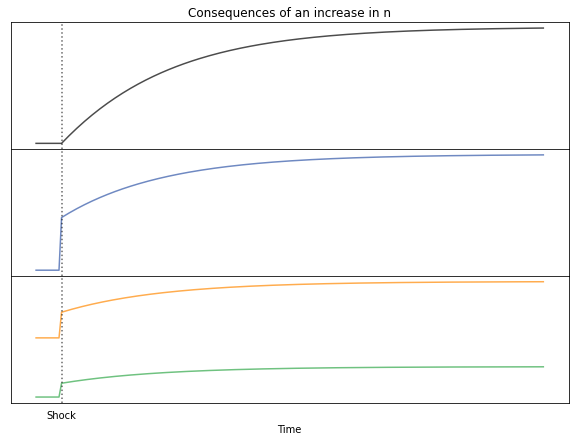

In [ ]:
T = 200                                                                          # Number of periods
t_shock = 10                                                                     # Period when shock happens

time = np.arange(T)                                                              # Array of time
y = np.zeros(T)         
k = np.zeros(T)         
i = np.zeros(T)         
c = np.zeros(T)         

y[0] = y_star_1                                                                  # Set initial values, at first, the economy is in its steady state
k[0] = k_star_1
i[0] = i_star_1
c[0] = c_star_1

A = np.zeros(T)
A[0:T] = A1                                                                      # From 0 to t_shock, the population growth rate is n1, from t_shock to T, the population growth rate is n2
A[t_shock:T] = A2                                                               

for j in range(1, T):                                                            # For each period, we calculate the variables
    k[j] = k[j-1] + i[j-1] - (n + delta) * k[j-1]
    y[j] = A[j] * k[j] ** alpha
    i[j] = s * y[j]
    c[j] = y[j] - i[j]
    
# Plot the effect of the shock on variables
ticks = [""] * T                                                                 # Create tick labels on the axis
ticks[t_shock] = 'Shock'                                                         # Create label "shock" 

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 7))          # Create a figure with 3 graphs
fig.subplots_adjust(hspace=0)                                                    # Plots be next to each other

ax1.set(title="Consequences of an increase in n")                                # Title
ax1.plot(time, k, "k-", alpha = 0.7)                                             # Alpha is here a variable for the line transparency
ax1.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax1.yaxis.set_major_locator(plt.NullLocator())                                   # Hide ticks
#ax1.text(150, 22.1, 'Capital: '+r'$k$')

ax2.plot(time, y, "#3257a8", alpha = 0.7)
ax2.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax2.yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
#ax2.text(150, 4.7, 'Output: '+ r'$y=f(k)$', color = "#3257a8")

ax3.plot(time, i, "#32a84a", alpha = 0.7)
ax3.plot(time, c, "#ff8903", alpha = 0.7)
ax3.axvline(x = t_shock, color="k", ls = ':', alpha = 0.6)
ax3.yaxis.set_major_locator(plt.NullLocator())                                   # Hide ticks
ax3.xaxis.set_major_locator(plt.NullLocator())                                   # Hide ticks
#ax3.text(150, 3.1, 'Consumption: '+r'$c = (1-s)y$', color = "#ff8903")
#ax3.text(150, 1.7, 'Investment: '+r'$i = sy$'     , color = "#32a84a")

plt.xticks(time, ticks)                                                          # Use user-defined ticks
plt.xlabel('Time')
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)       # Hide tick marks